# Compare multi fitted atmospheric parameters with MERRA2

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : March 7th 2023
- last update : March 7th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## MERRA2

In [5]:
path_merra2="data/merra2"
file_merra2="MERRA2_2023_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv"

In [6]:
merra2 = pd.read_csv(os.path.join(path_merra2,file_merra2))

In [7]:
merra2

,time,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0,2023-01-01 00:00:00,78620.320,284.24590,284.19403,267.12990,0.005727,0.000000,2.642721e-05,5.599337,283.92380,1.750564,1.238044,2.038036,-0.090943,-0.012991,-0.419707
1,2023-01-01 01:00:00,78645.195,282.94003,282.63483,267.16120,0.005727,0.000000,7.297844e-06,4.944884,282.22986,0.164982,0.114584,0.112569,0.002039,0.040294,-0.018076
2,2023-01-01 02:00:00,78658.790,282.69012,281.91070,266.89362,0.005721,0.000000,1.972541e-06,4.232842,280.79850,-0.738192,-0.392655,-0.988660,-0.194765,-0.107497,-0.264359
3,2023-01-01 03:00:00,78664.510,282.95117,281.80444,266.16187,0.005706,0.000000,5.257316e-07,3.744954,279.49896,-0.444341,-0.294611,-0.499962,-0.778797,-0.391749,-1.194732
4,2023-01-01 04:00:00,78652.450,283.03754,281.62714,265.97803,0.005702,0.000000,9.333598e-08,3.388126,278.33760,-0.331920,-0.232934,-0.348620,-1.210167,-0.640487,-1.799269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-01-31 19:00:00,78432.266,294.37033,296.61950,250.90482,0.005390,0.026825,1.749039e-03,18.284418,307.05304,6.426155,5.262032,4.149429,0.629419,0.509980,0.474594
740,2023-01-31 20:00:00,78409.230,293.71957,295.63540,251.81679,0.005409,0.020279,6.649494e-04,17.339400,304.55300,5.578595,4.588512,3.511225,1.136982,0.933857,1.009418
741,2023-01-31 21:00:00,78373.336,293.13504,294.66140,252.42526,0.005422,0.018440,4.937649e-04,16.584492,301.52832,5.005930,4.108035,3.139801,1.557899,1.279055,1.477757
742,2023-01-31 22:00:00,78370.860,292.08298,293.08356,253.00182,0.005435,0.025490,6.892681e-04,16.598146,297.00990,5.036667,4.058763,3.508101,1.748297,1.410262,1.708478


In [8]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
pwv_merra2 = merra2['TQV']

Text(0.5, 1.0, 'precipitable water vapor in MERRA2 in 2022')

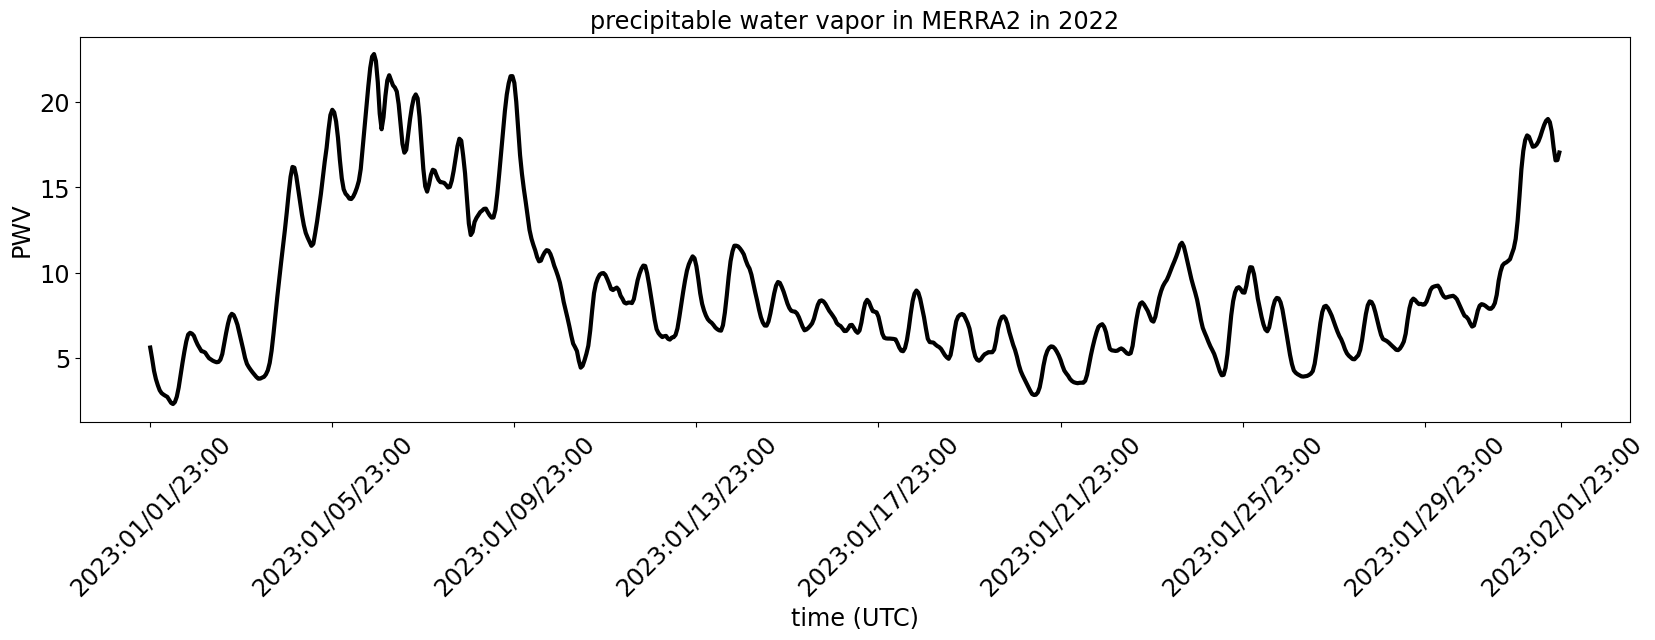

In [9]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,pwv_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("PWV")
ax.set_title('precipitable water vapor in MERRA2 in 2022')

In [10]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
oz_merra2 = merra2['TO3']

(0.0, 600.0)

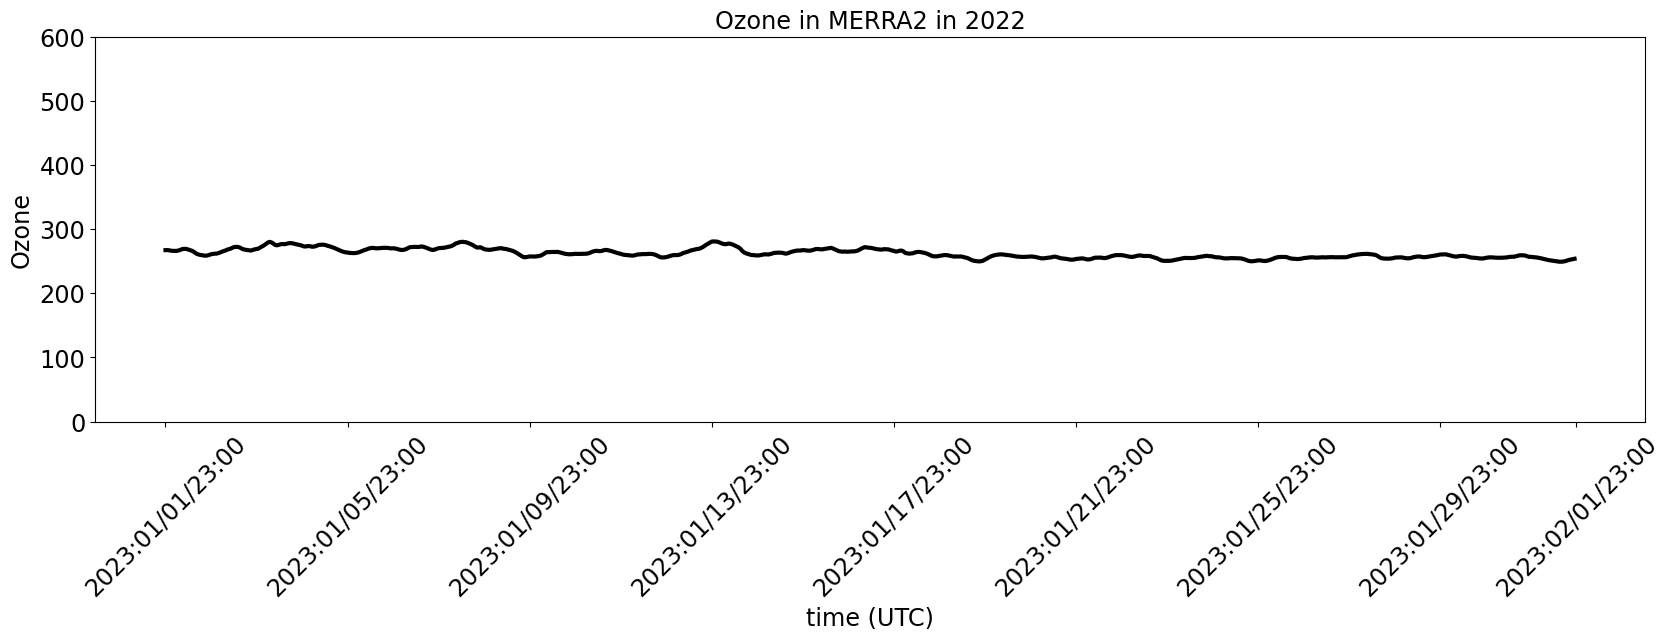

In [11]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,oz_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("Ozone")
ax.set_title('Ozone in MERRA2 in 2022')
ax.set_ylim(0,600)

## Data

In [12]:
DATE="2023 01 (17,18,19)" 
#and 2022/03/17 and 2022/06 (29,30)"
#DATE="2022/03/17 and 2022/06 (29,30)"

In [13]:
FLAG_SELECT_POLAR = False
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [14]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [15]:
path_out = "dataout/fitparamatm"

In [16]:
filenames = [
"multifitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-19-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-19-empty~holo4_003-psf2dffm-rebin2.csv",
#"multifitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv",
#"multifitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv", 
#"multifitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv",    
#"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv",
]

In [17]:
NDAYS = 3
tags = ["OG550 23/01/17", "OG550 23/01/18", "OG550 23/01/19", "No Filt 23/01/17", "NoFilt 23/01/18", "NoFilt 23/01/19",
       "No fit 2022/03/17","No fit 2022/06/29","No fit 2022/06/30"]

#tags = ["2022/03/17","2022/06/29","2022/06/30"]

In [18]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename))
    df=df.dropna(axis=0)
    
    if FLAG_SELECT_POLAR:
        df = df[df["object"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [19]:
NF =len(all_df)

In [20]:
all_df[0].head()

,Unnamed: 0,number,object,dateobs,refhour,airmass,pressure,temperature,humidity,filename,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,253,HD185975,2023-01-18T03:08:52.415500962Z,-1.943737,2.111228,0,0,0,2023011700253,...,0.001282,0.001830,6.252164,3.373353,1.013166,0.150339,0.001281,0.047650,2.961447,0.265350
1,1,269,HD38666,2023-01-18T03:21:14.695994415Z,-1.737548,1.011768,0,0,0,2023011700269,...,0.000283,0.075839,18.576419,3.550935,1.026247,0.054363,0.000250,0.024055,3.488531,0.212568
2,2,270,HD38666,2023-01-18T03:21:57.571002150Z,-1.725638,1.012175,0,0,0,2023011700270,...,0.000244,0.098993,53.383568,3.326029,1.015661,0.045764,0.000214,0.049850,3.720334,0.215382
3,3,279,HD38666,2023-01-18T03:27:10.165993443Z,-1.638806,1.015372,0,0,0,2023011700279,...,0.000231,0.068494,33.766977,3.059429,1.025985,0.043017,0.000203,0.010321,3.170198,0.105023
4,4,280,HD38666,2023-01-18T03:27:52.980498634Z,-1.626913,1.015841,0,0,0,2023011700280,...,0.000291,0.067267,19.594017,3.450047,1.026378,0.053785,0.000255,0.018607,3.418016,0.113220


In [21]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/843904698.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


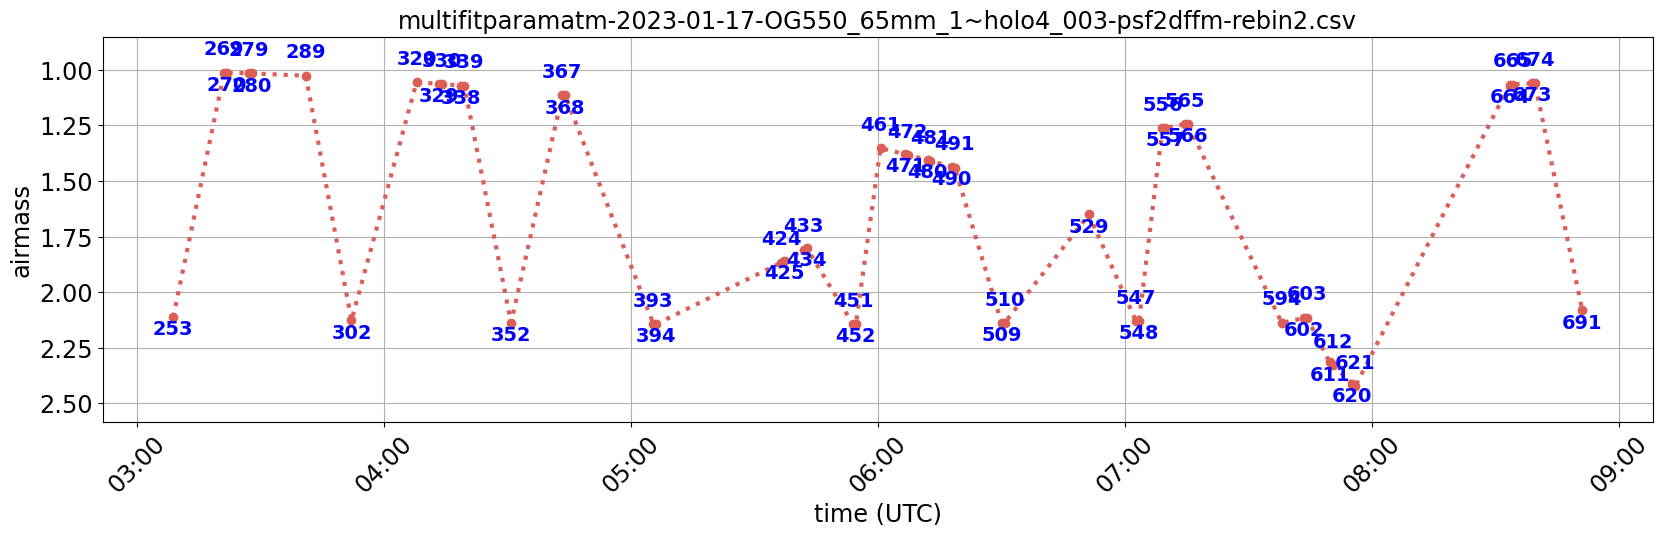

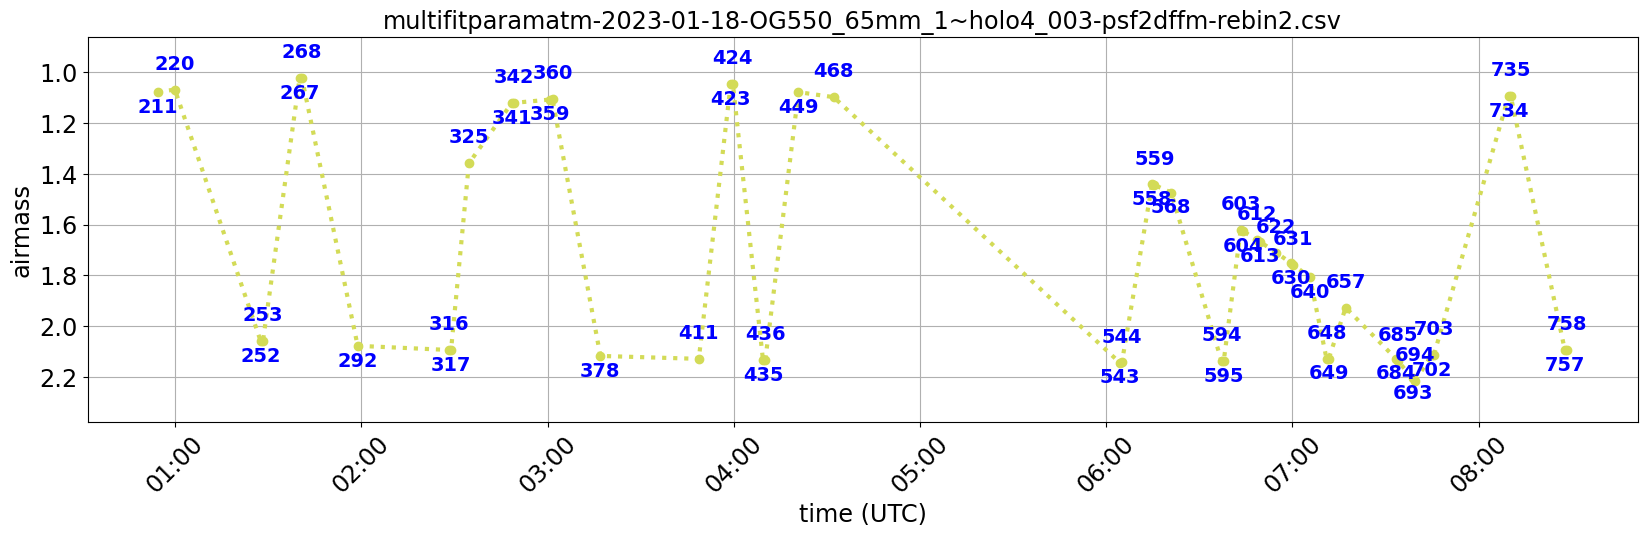

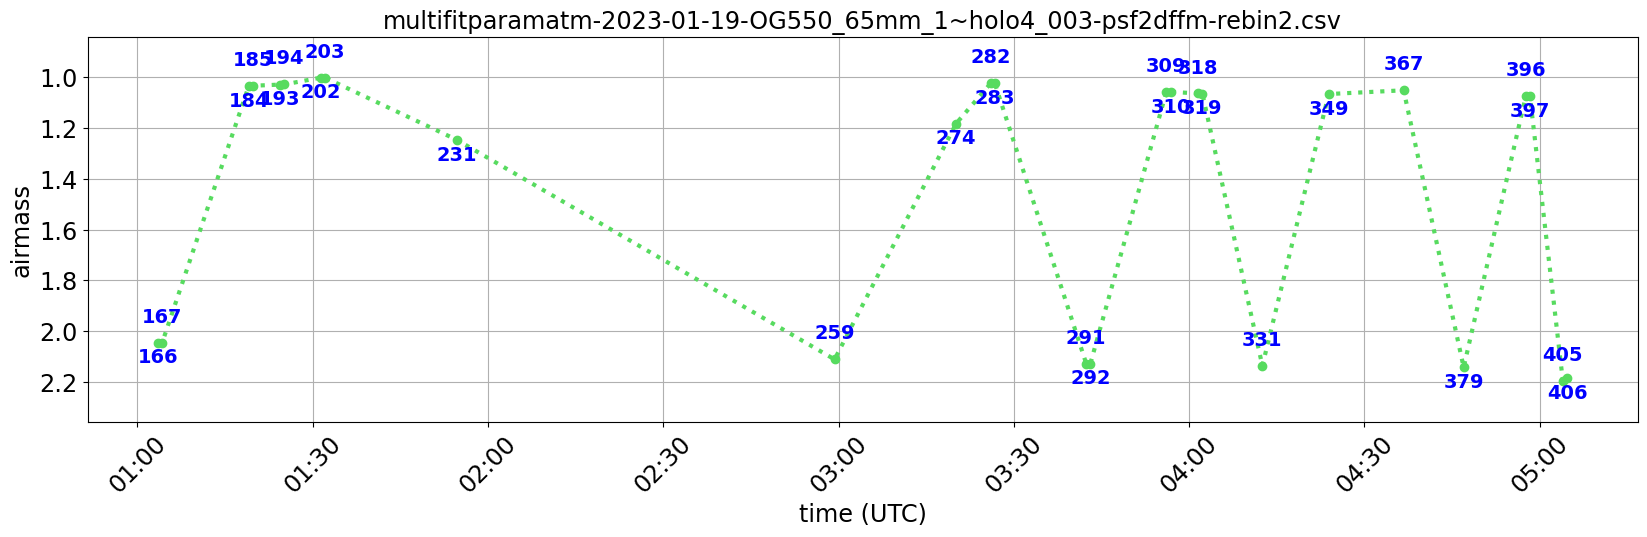

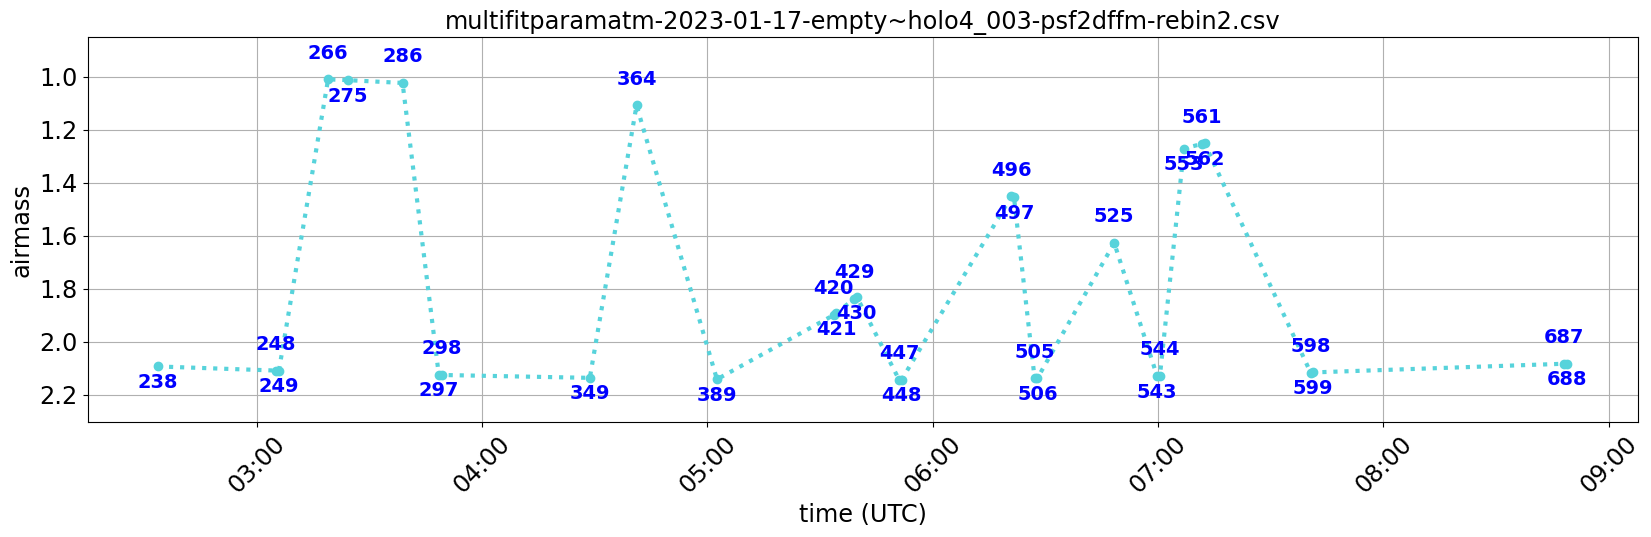

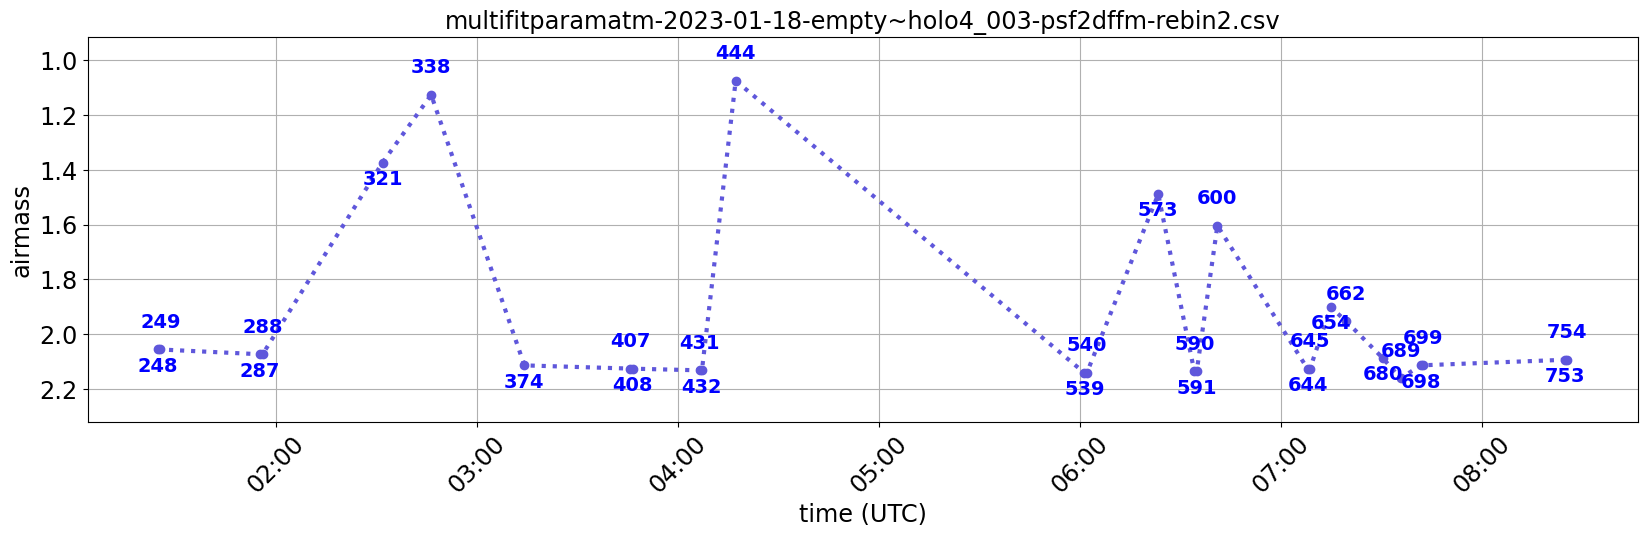

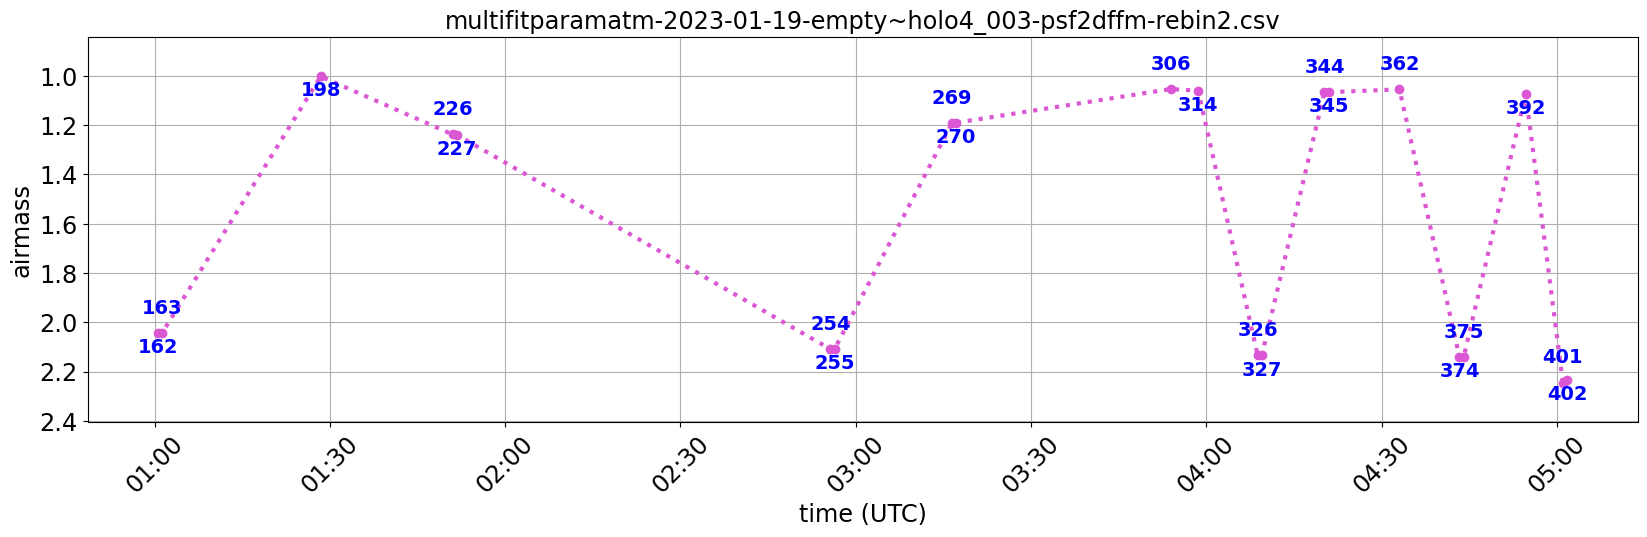

In [22]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    airmasses = infos['airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

## Precipitable water vapor

### Plot all PWV in different figures

In [23]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/2594509097.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


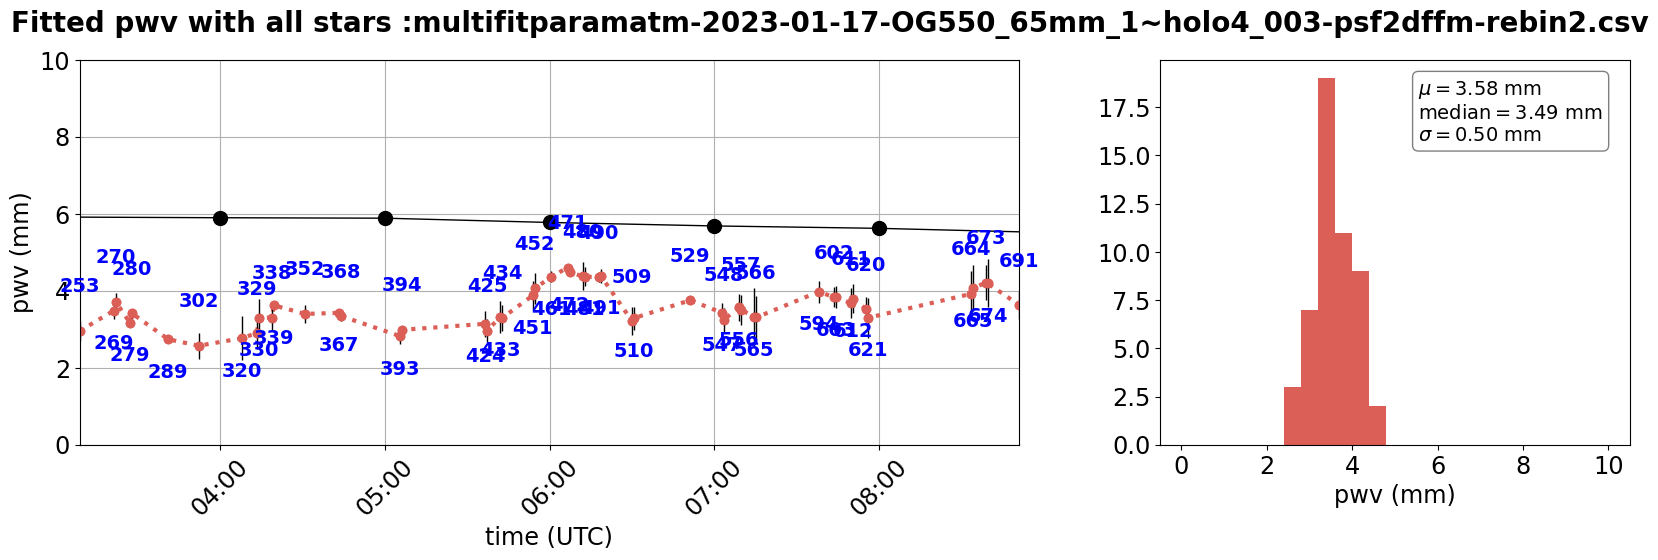

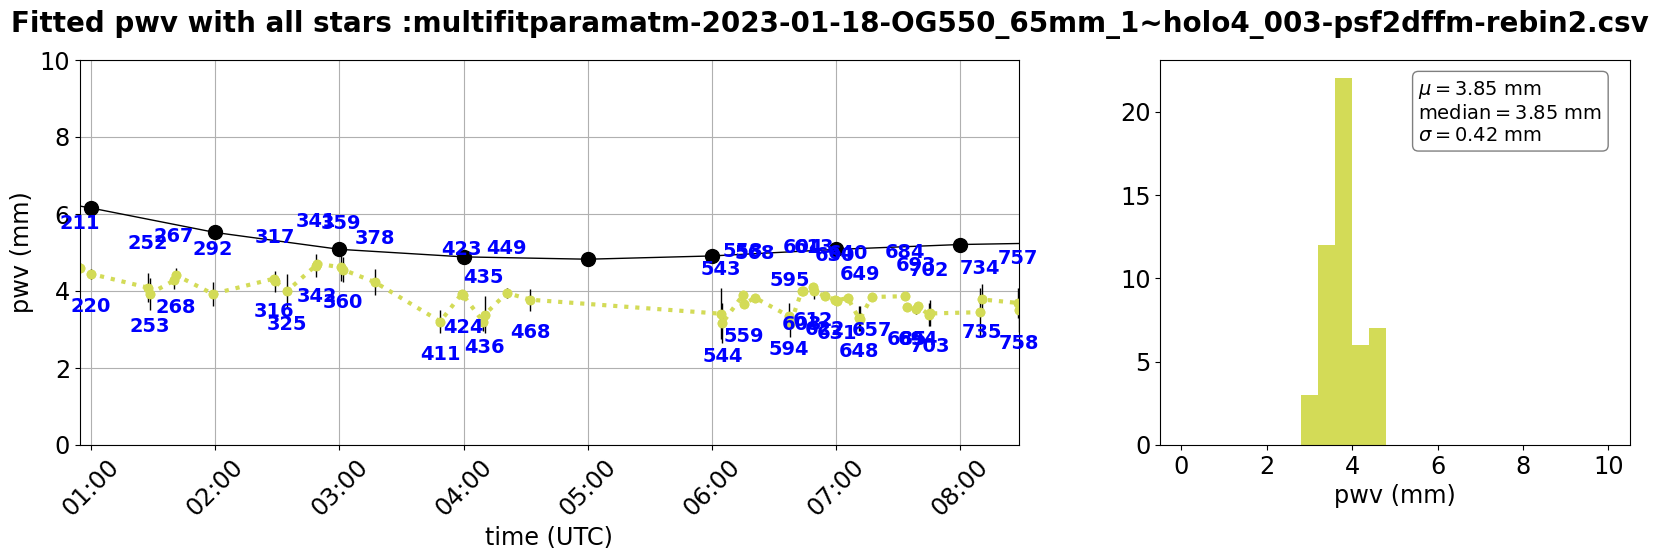

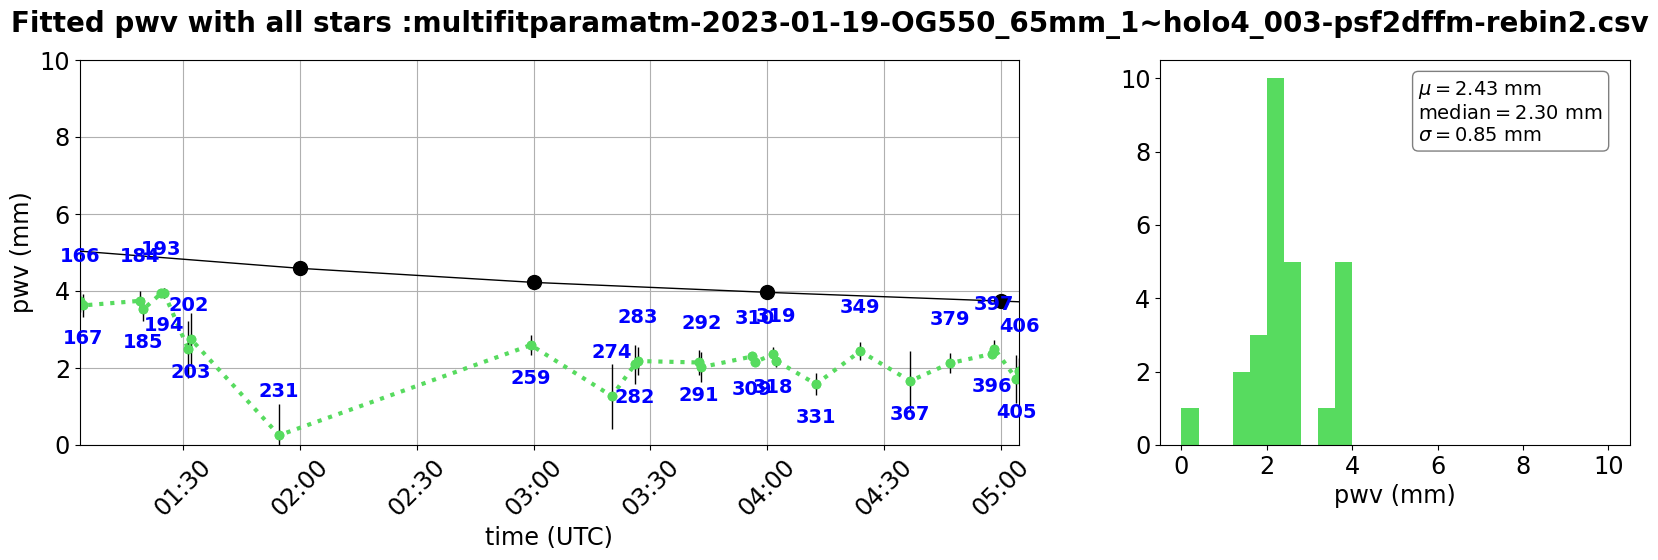

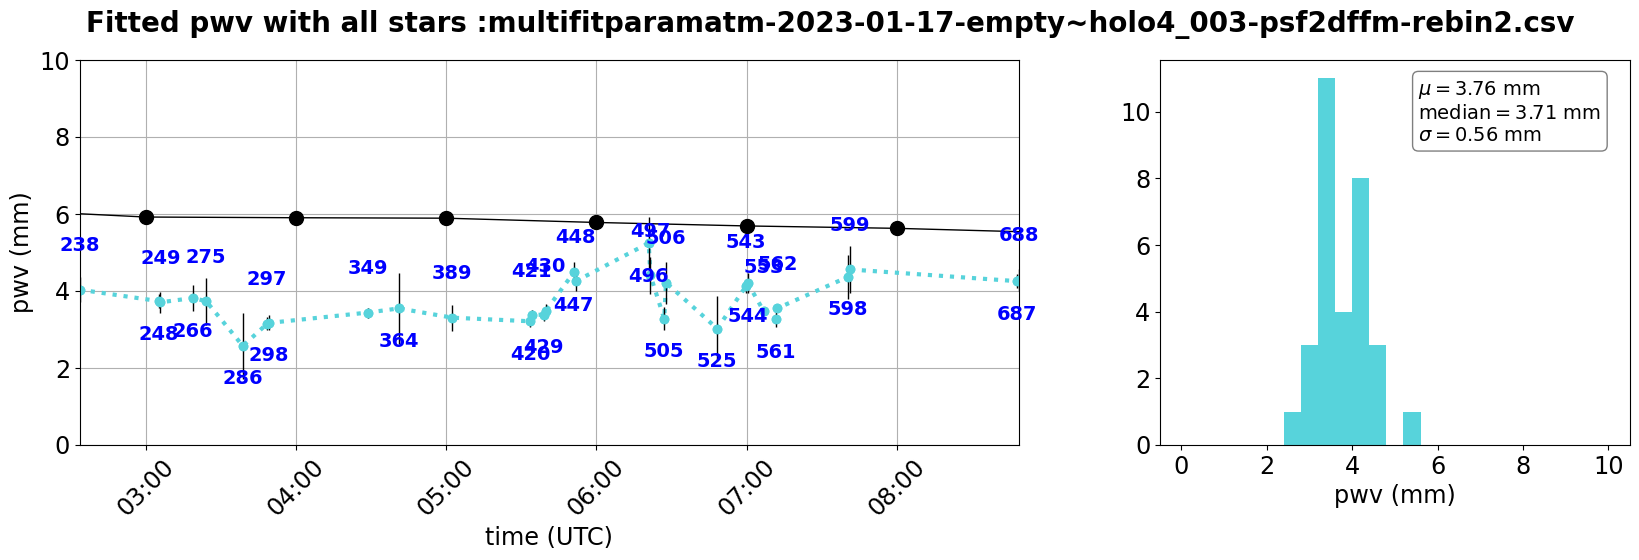

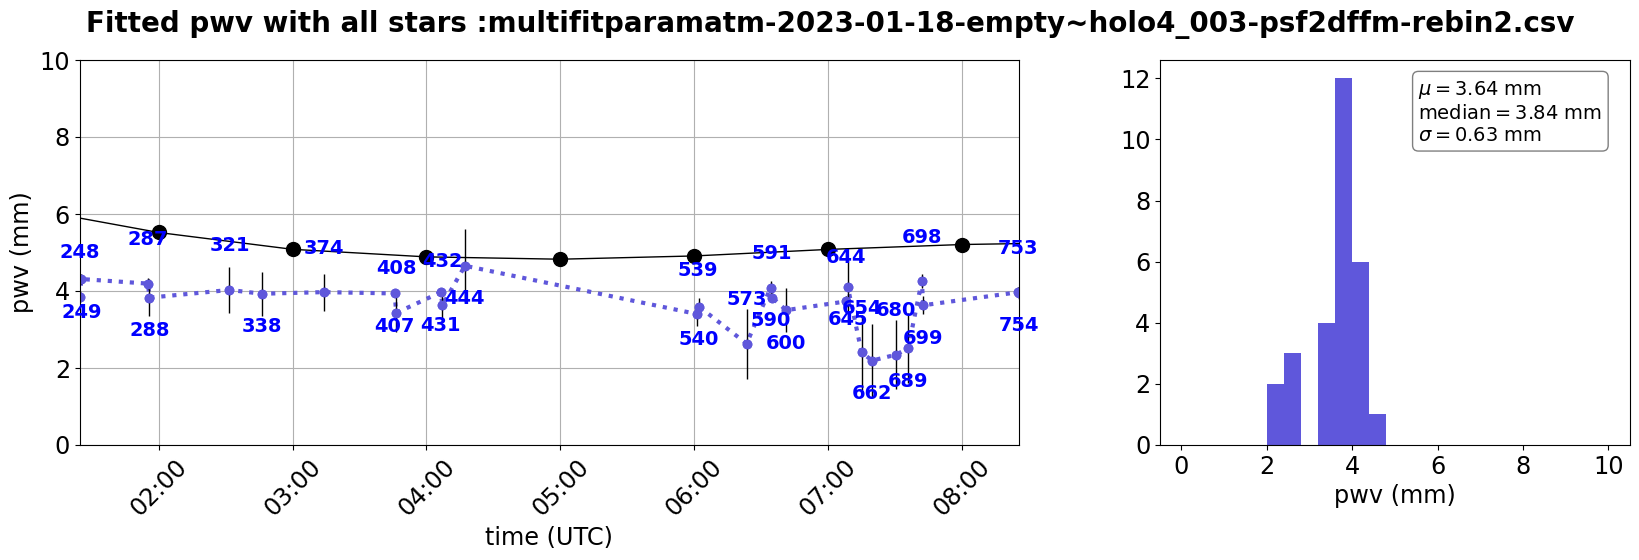

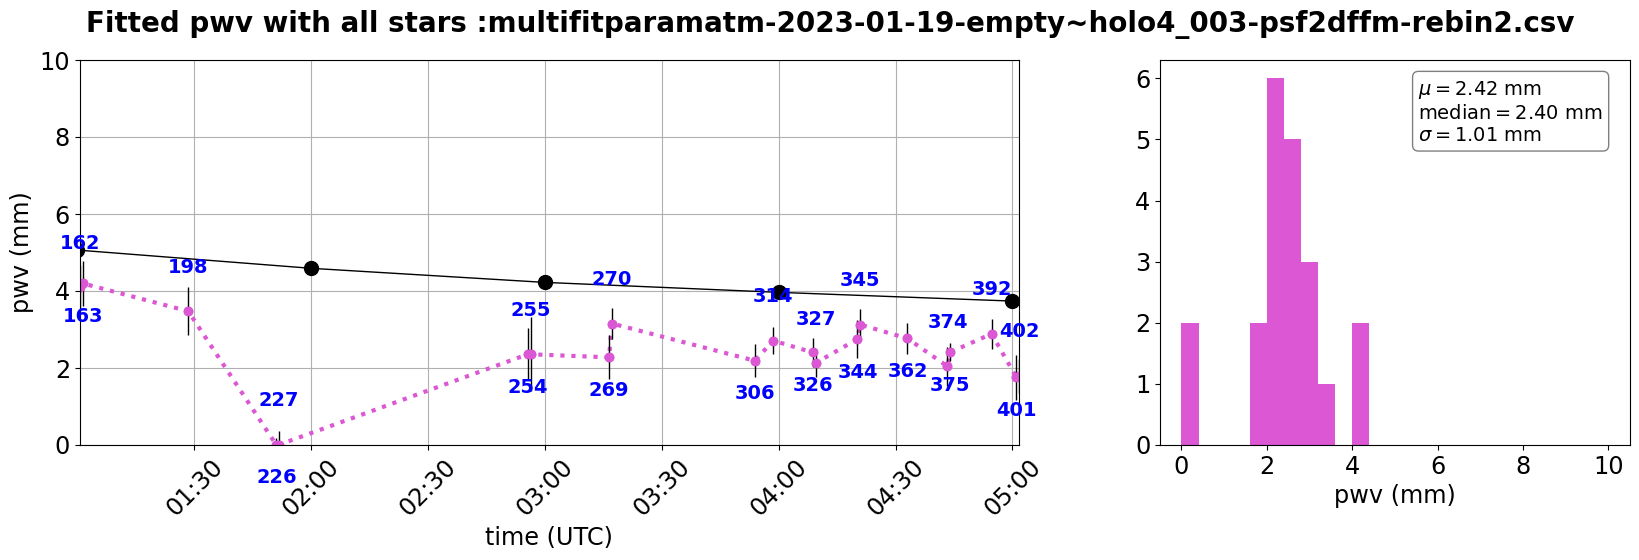

In [24]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label="merra2")
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="RERRA2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/325730268.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


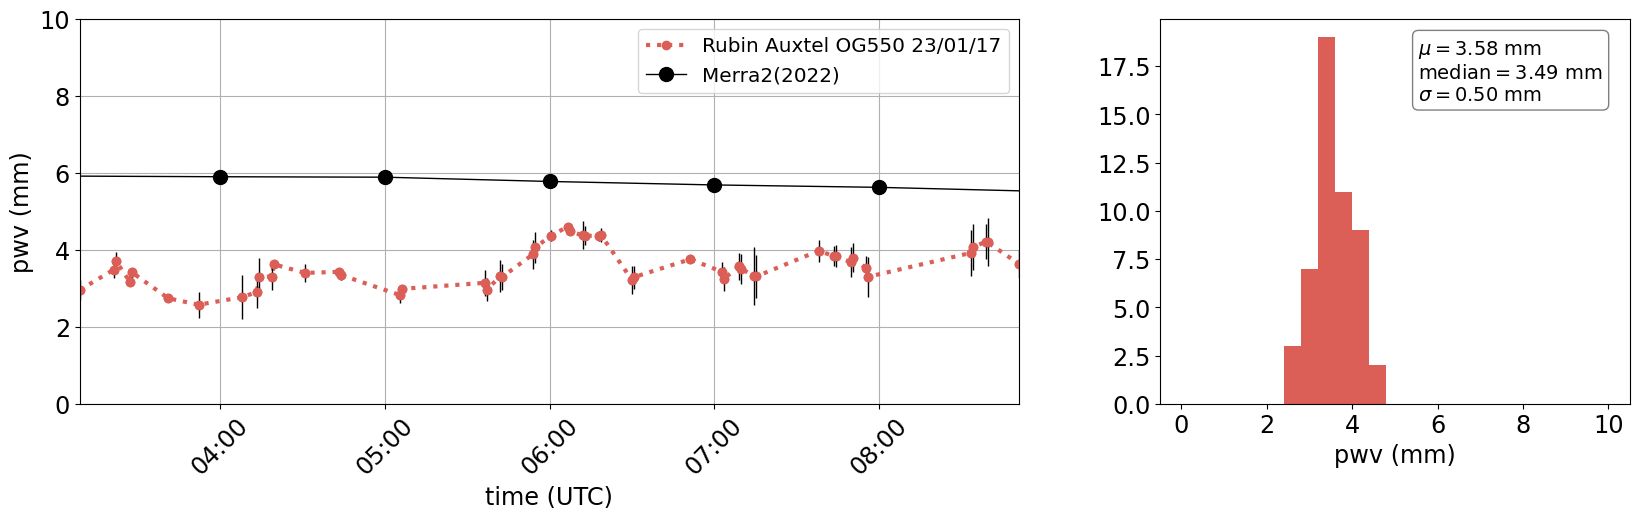

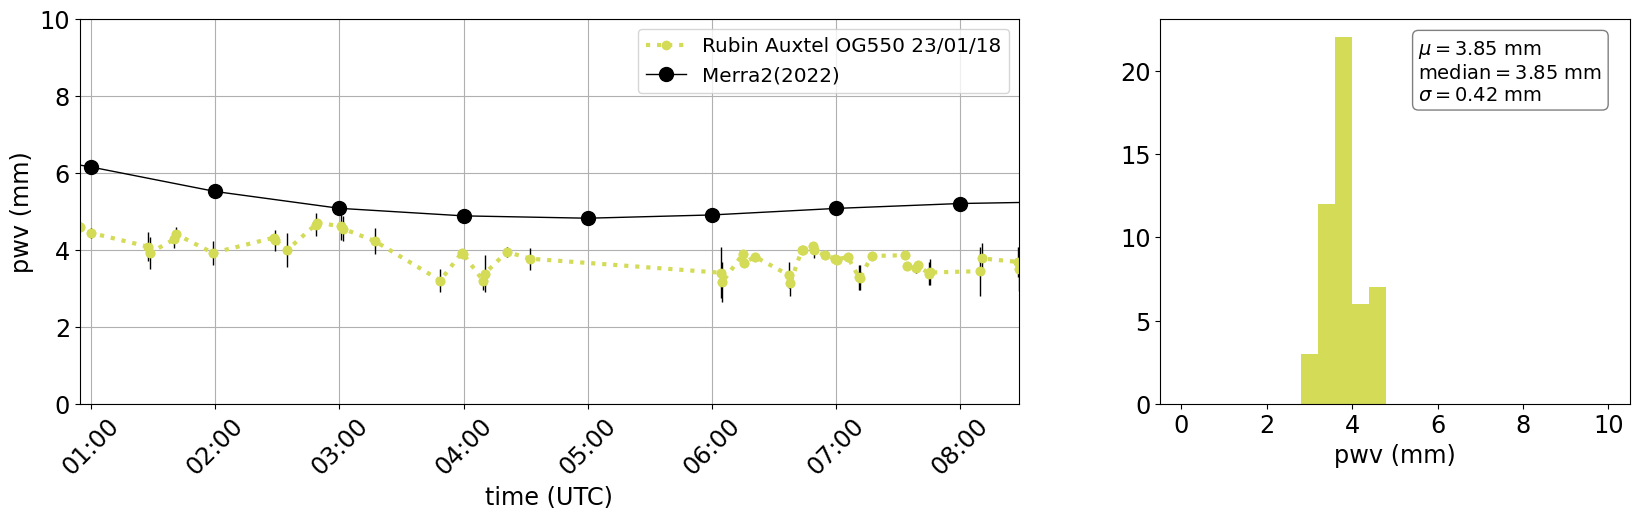

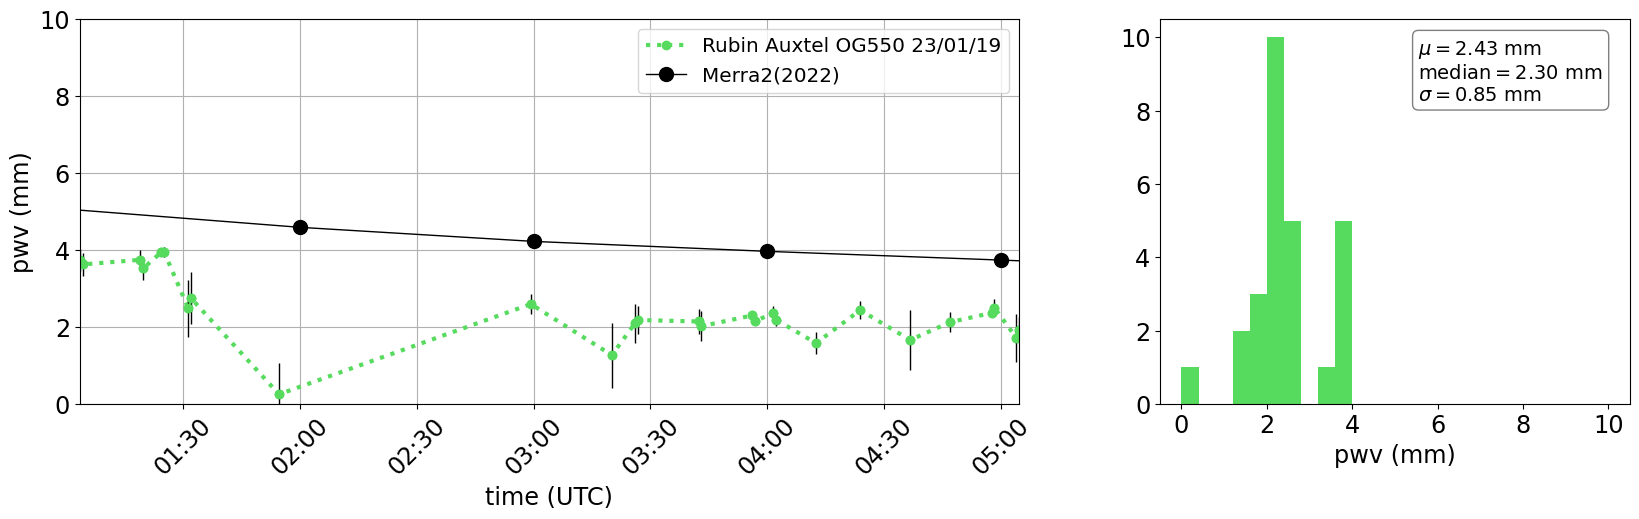

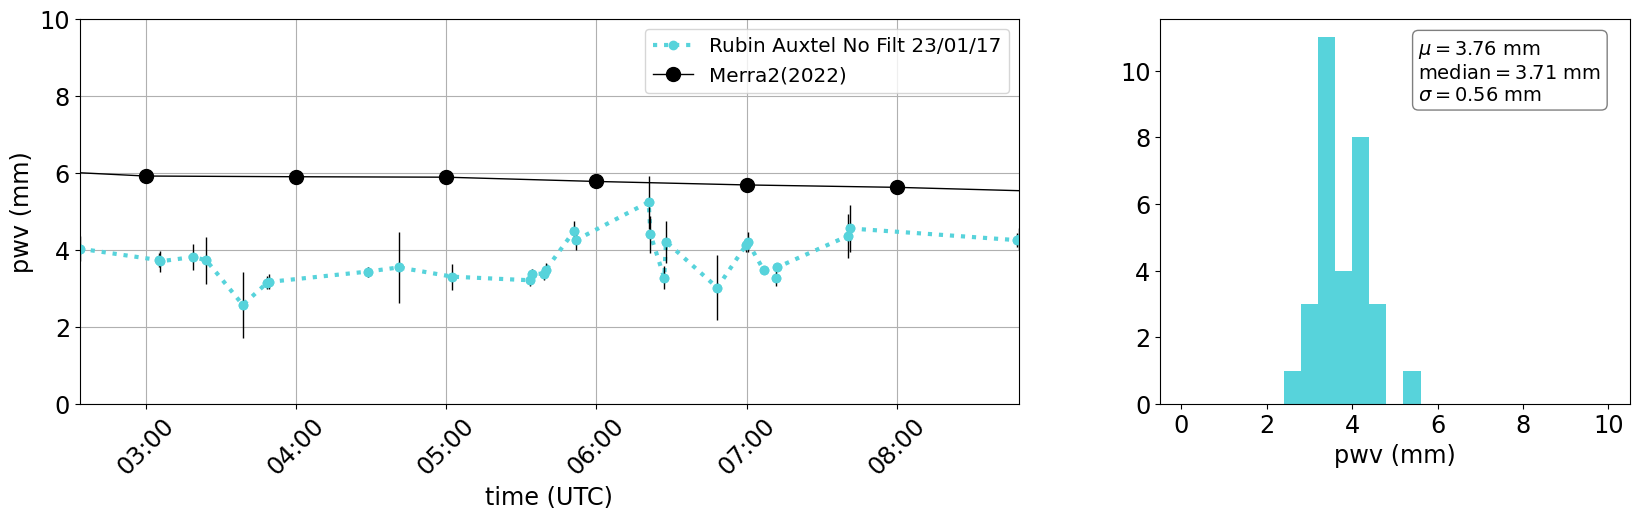

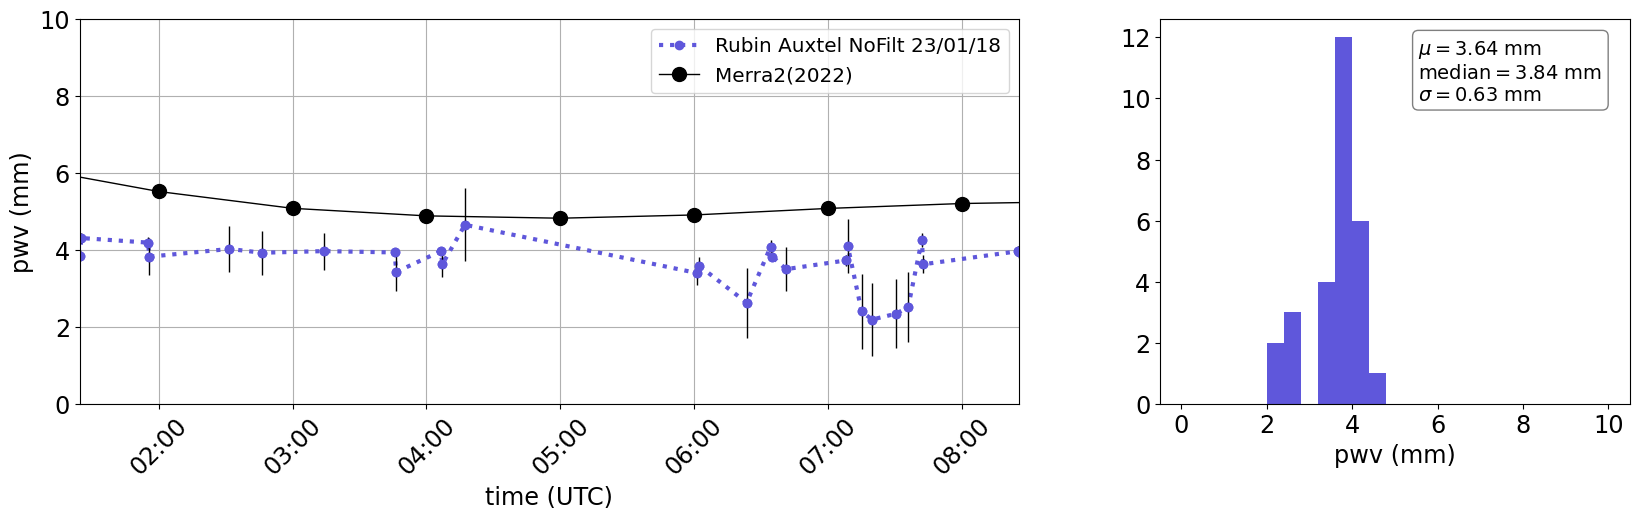

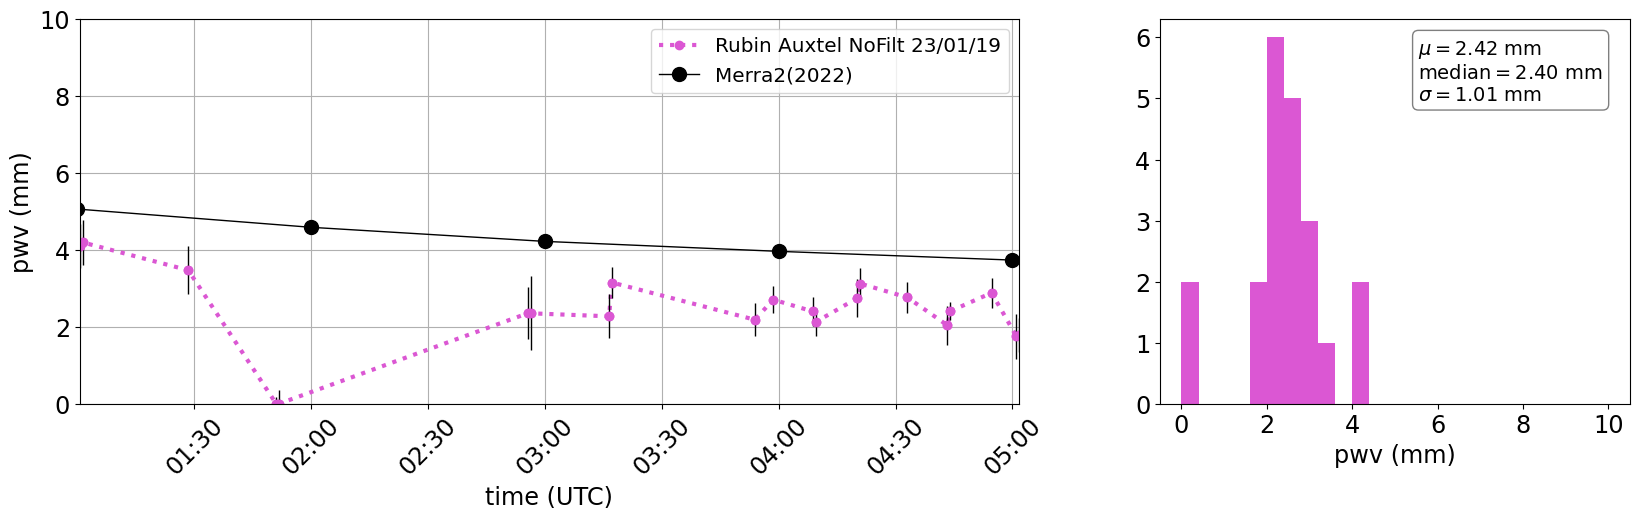

In [25]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 



  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.legend()

    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted pwv with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/1950500089.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


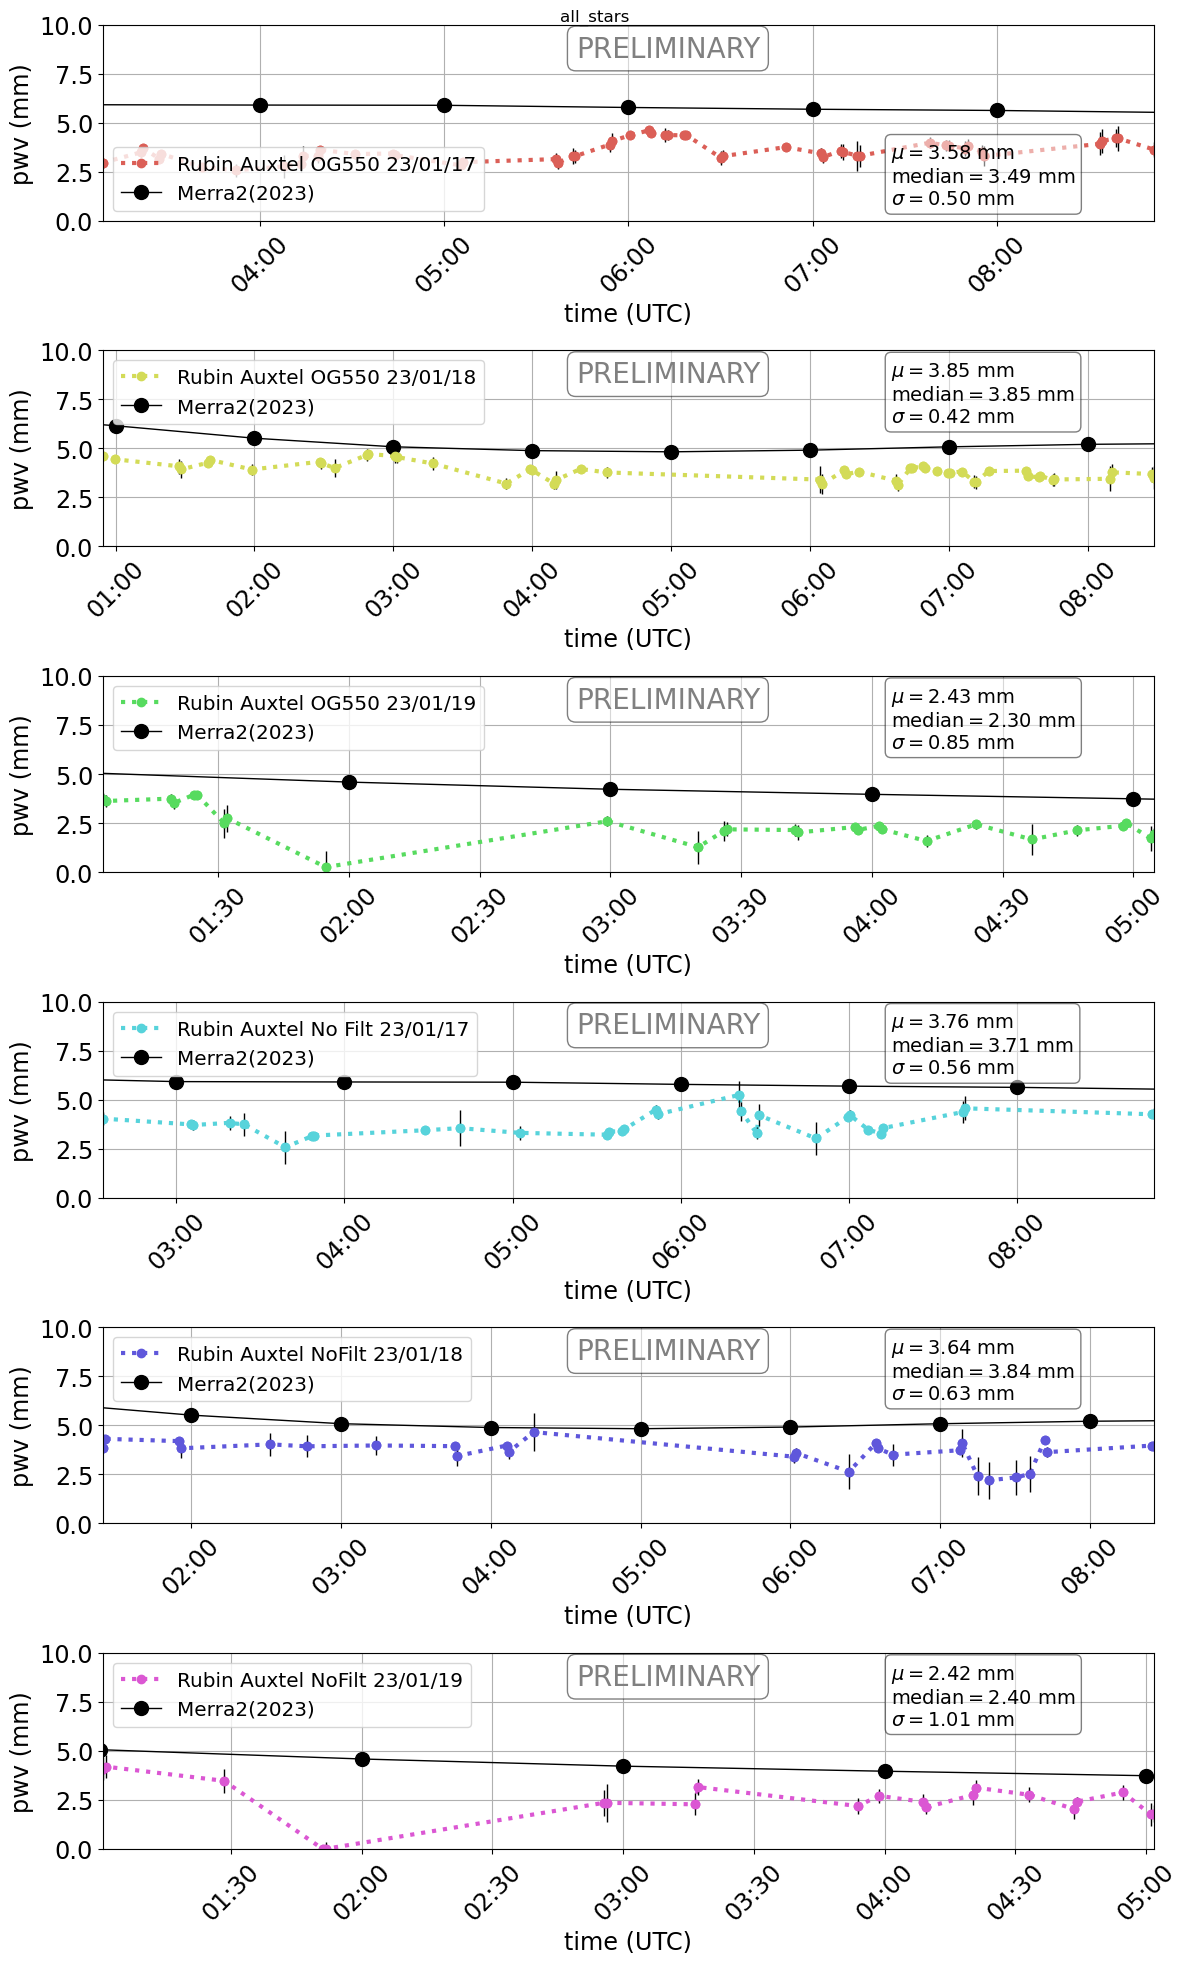

In [26]:
fig = plt.figure(figsize=(12,20))

gs = gridspec.GridSpec(6, 1,height_ratios=[1,1,1,1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2023)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(0.,10.)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_pwv_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

# Ozone

In [27]:
infos.columns

Index(['Unnamed: 0', 'number', 'object', 'dateobs', 'refhour', 'airmass',
       'pressure', 'temperature', 'humidity', 'filename', 'targetx_pix',
       'targety_pix', 'rotangle', 'd2ccd', 'chi2_1', 'pwv_1', 'oz_1', 'grey_1',
       'epwv_1', 'eoz_1', 'egrey_1', 'SNR_1', 'chi2_2', 'pwv_2', 'grey_2',
       'epwv_2', 'egrey_2', 'SNR_2', 'chi2_3', 'pwv_3', 'grey_3', 'epwv_3',
       'egrey_3', 'SNR_3', 'chi2_4', 'pwv_4', 'grey_4', 'epwv_4', 'egrey_4',
       'SNR_4', 'pwv_avg', 'pwv_sig'],
      dtype='object')

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/3331391516.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


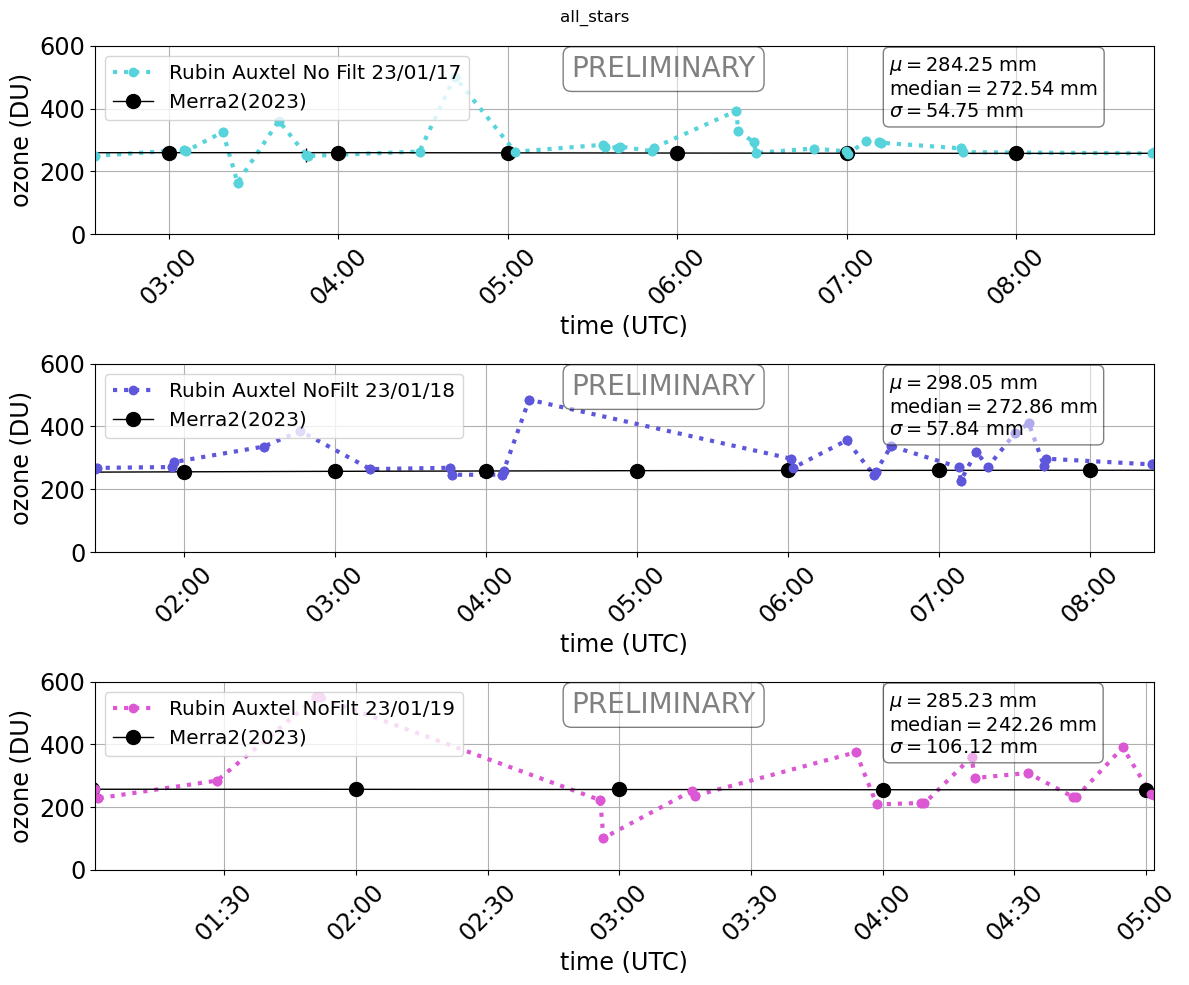

In [28]:
fig = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(3, 1,height_ratios=[1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    if idx<3:
        continue
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    oz= infos['oz_1'].values
    eoz= infos['eoz_1'].values
    
    mu = oz.mean()
    median = np.median(oz)
    sigma =oz.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx-3,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,oz_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2023)")
    
    
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("ozone (DU)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(0.,600.)




plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_oz_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    
    
    

# ANR Figure

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/2402335449.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_26397/2402335449.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


ValueError: x and y must have same first dimension, but have shapes (27,) and (21,)

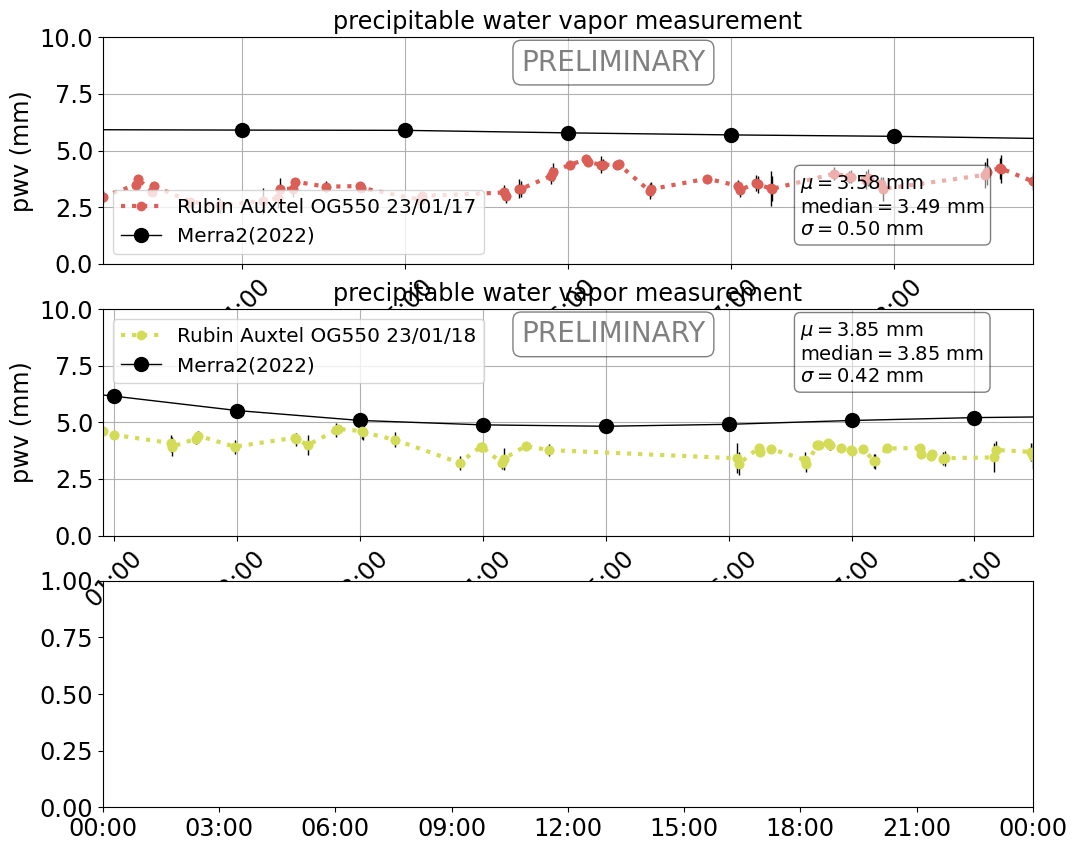

In [29]:
fig = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(3, 1,height_ratios=[1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    if idx>3:
        continue
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    if idx<6: 
    
        pwv= infos['pwv_avg'].values
        epwv= infos['pwv_sig'].values
    
        mu = pwv.mean()
        median = np.median(pwv)
        sigma =pwv.std()
        
    else:
        
        oz= infos['oz_1'].values
        eoz= infos['eoz_1'].values
    
        mu = oz.mean()
        median = np.median(oz)
        sigma =oz.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    if idx < 2:
        ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
        ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
        ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
    else:
        ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
        ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
        ax.plot(all_merra2_datetime,oz_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
        
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    
    if idx < 2:
        ax.set_ylabel("pwv (mm)")
    else:
        ax.set_ylabel("Ozone (DU)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
    if idx < 2:
        
        textstr = '\n'.join((
        r'$\mu=%.2f$ mm' % (mu, ),
        r'$\mathrm{median}=%.2f$ mm' % (median, ),
        r'$\sigma=%.2f$ mm' % (sigma, )))
    else:
        textstr = '\n'.join((
        r'$\mu=%.2f$ DU' % (mu, ),
        r'$\mathrm{median}=%.2f$ DU' % (median, ),
        r'$\sigma=%.2f$ DU' % (sigma, )))
        
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    if idx < 2:
        ax.set_ylim(0.,10.)
        ax.set_title("precipitable water vapor measurement")
    else:
        ax.set_ylim(0.,600)
        ax.set_title("ozone measurement")


plt.tight_layout()    
plt.show()
    
    